In [22]:
import requests

article_title = "Russo-Ukrainian_War"
url = f"https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/{article_title}/monthly/20220101/20250101"

headers = {
    "User-Agent": "MyApp/1.0 (willma.muller@yahoo.ro)"
}

response = requests.get(url, headers=headers)

if response.status_code == 200:
    data = response.json()
    print("Pageviews data:")
    for item in data['items']:  
        print(f"Date: {item['timestamp']}, Views: {item['views']}")
else:
    print(f"Failed to fetch data. Status code: {response.status_code}")
    print(response.text)


Pageviews data:
Date: 2022010100, Views: 552975
Date: 2022020100, Views: 5400695
Date: 2022030100, Views: 4544233
Date: 2022040100, Views: 1280088
Date: 2022050100, Views: 1035656
Date: 2022060100, Views: 748177
Date: 2022070100, Views: 672004
Date: 2022080100, Views: 694793
Date: 2022090100, Views: 1016043
Date: 2022100100, Views: 1019214
Date: 2022110100, Views: 852350
Date: 2022120100, Views: 676456
Date: 2023010100, Views: 702005
Date: 2023020100, Views: 691046
Date: 2023030100, Views: 637852
Date: 2023040100, Views: 473235
Date: 2023050100, Views: 574928
Date: 2023060100, Views: 713753
Date: 2023070100, Views: 587832
Date: 2023080100, Views: 556404
Date: 2023090100, Views: 508050
Date: 2023100100, Views: 606983
Date: 2023110100, Views: 462551
Date: 2023120100, Views: 491133
Date: 2024010100, Views: 512459
Date: 2024020100, Views: 615378
Date: 2024030100, Views: 507946
Date: 2024040100, Views: 459216
Date: 2024050100, Views: 450929
Date: 2024060100, Views: 401173
Date: 2024070100, 

In [23]:
import requests

# Define the category and API URL
category_name = "Russo-Ukrainian_War"  
url = f"https://en.wikipedia.org/w/api.php?action=query&list=categorymembers&cmtitle=Category:{category_name}&cmlimit=50&format=json"

# Fetch data
response = requests.get(url)

# Parse and display data
if response.status_code == 200:
    data = response.json()
    articles = [item['title'] for item in data['query']['categorymembers']]
    print("Articles in the category:")
    for article in articles:
        print(article)
else:
    print(f"Failed to fetch category members. Status: {response.status_code}, Response: {response.text}")


Articles in the category:
Russo-Ukrainian War
Annexation of Crimea by the Russian Federation
Russian invasion of Ukraine
War in Donbas
Outline of the Russo-Ukrainian War
2014 pro-Russian unrest in Ukraine
2015 Ukraine power grid hack
2024 visits by Viktor Orbán to Russia and China
Anti-Maidan
Best in Hell
Book of Remembrance for Those Who Fell for Ukraine
Bridges in the Russo-Ukrainian War
Confiscation of Russian central bank funds
Crimean consensus
Croatia and the Russo-Ukrainian War
2017 Ukraine ransomware attacks
Environmental impact of the Russian occupation of Crimea
European Deterrence Initiative
Georgia and the Russian invasion of Ukraine
Humanitarian impacts of the Russian invasion of Ukraine
Humanitarian situation during the war in Donbas
Hydraulic warfare
Intermarium (region)
International recognition of the Donetsk People's Republic and the Luhansk People's Republic
International sanctions during the Russian invasion of Ukraine
International sanctions during the Russo-Ukrain

In [ ]:
import requests
import time

category_name = "Russo-Ukrainian_War"
category_url = f"https://en.wikipedia.org/w/api.php?action=query&list=categorymembers&cmtitle=Category:{category_name}&cmlimit=50&format=json"

# Fetch category members
response = requests.get(category_url)
if response.status_code == 200:
    data = response.json()
    articles = [item['title'] for item in data['query']['categorymembers']]
else:
    print(f"Failed to fetch category members. Status: {response.status_code}, Response: {response.text}")
    articles = []

# Fetch pageviews for each article
pageviews = {}
for article in articles:
    article_title = article.replace(" ", "_")
    pageviews_url = f"https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/{article_title}/daily/20220101/20250101"

    # Include User-Agent
    headers = {"User-Agent": "PageviewAnalysis/1.0 (myemail@example.com)"}

    # Fetch data
    response = requests.get(pageviews_url, headers=headers)
    if response.status_code == 200:
        pageviews[article] = response.json()
        print(f"Retrieved pageviews for: {article}")
    else:
        print(f"Failed to fetch pageviews for {article}. Status: {response.status_code}")
    
    # Pause to avoid rate-limiting
    time.sleep(1)

# Results
print("Pageviews for articles in the category:")
for article, views in pageviews.items():
    print(f"Article: {article}, Total Views: {sum(item['views'] for item in views['items'])}")


Retrieved pageviews for: Russo-Ukrainian War
Retrieved pageviews for: Annexation of Crimea by the Russian Federation
Retrieved pageviews for: Russian invasion of Ukraine
Retrieved pageviews for: War in Donbas
Retrieved pageviews for: Outline of the Russo-Ukrainian War
Retrieved pageviews for: 2014 pro-Russian unrest in Ukraine
Retrieved pageviews for: 2015 Ukraine power grid hack
Retrieved pageviews for: 2024 visits by Viktor Orbán to Russia and China
Retrieved pageviews for: Anti-Maidan
Retrieved pageviews for: Best in Hell
Retrieved pageviews for: Book of Remembrance for Those Who Fell for Ukraine
Retrieved pageviews for: Bridges in the Russo-Ukrainian War
Retrieved pageviews for: Confiscation of Russian central bank funds
Retrieved pageviews for: Crimean consensus
Retrieved pageviews for: Croatia and the Russo-Ukrainian War
Retrieved pageviews for: 2017 Ukraine ransomware attacks
Retrieved pageviews for: Environmental impact of the Russian occupation of Crimea
Retrieved pageviews fo

In [27]:
import requests

def fetch_pageviews(article, start_date, end_date, granularity):
    # API 
    url = f"https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/{article}/{granularity}/{start_date}/{end_date}"
    
    
    headers = {"User-Agent": "PageviewAnalysis/1.0 (myemail@example.com)"}
    
    response = requests.get(url, headers=headers)
    
    # Handle the response
    if response.status_code == 200:
        data = response.json()
        for item in data['items']:
            print(f"Date: {item['timestamp']}, Views: {item['views']}")
    else:
        print(f"Failed to fetch data. Status: {response.status_code}, Response: {response.text}")

# Example usage
#fetch_pageviews("Russo-Ukrainian_War", "20220101", "20220131", "daily")  # Daily data for January 2022
#fetch_pageviews("Russo-Ukrainian_War", "20210101", "20211201", "monthly")  # Monthly data for 2022
fetch_pageviews("Russo-Ukrainian_War", "20220201", "20220301", "daily")  # Monthly data for 2022
fetch_pageviews("Russo-Ukrainian_War", "20230201", "20230301", "monthly") 

Date: 2022020100, Views: 18511
Date: 2022020200, Views: 18947
Date: 2022020300, Views: 17347
Date: 2022020400, Views: 14918
Date: 2022020500, Views: 13338
Date: 2022020600, Views: 15985
Date: 2022020700, Views: 17388
Date: 2022020800, Views: 14681
Date: 2022020900, Views: 11259
Date: 2022021000, Views: 13040
Date: 2022021100, Views: 30227
Date: 2022021200, Views: 58110
Date: 2022021300, Views: 47581
Date: 2022021400, Views: 51958
Date: 2022021500, Views: 56435
Date: 2022021600, Views: 39077
Date: 2022021700, Views: 39281
Date: 2022021800, Views: 41507
Date: 2022021900, Views: 49650
Date: 2022022000, Views: 53254
Date: 2022022100, Views: 81815
Date: 2022022200, Views: 187116
Date: 2022022300, Views: 140794
Date: 2022022400, Views: 1356293
Date: 2022022500, Views: 1000707
Date: 2022022600, Views: 781345
Date: 2022022700, Views: 681392
Date: 2022022800, Views: 548739
Date: 2022030100, Views: 453134
Date: 2023020100, Views: 691046
Date: 2023030100, Views: 26661


In [28]:
import requests
import time

def fetch_articles_in_category(category_name):
    """Fetch all articles in a given category."""
    url = f"https://en.wikipedia.org/w/api.php?action=query&list=categorymembers&cmtitle=Category:{category_name}&cmlimit=50&format=json"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        articles = [item['title'] for item in data['query']['categorymembers']]
        return articles
    else:
        print(f"Failed to fetch articles for category {category_name}. Status: {response.status_code}, Response: {response.text}")
        return []

def fetch_pageviews(article, start_date, end_date, granularity):
    """Fetch pageviews for a given article."""
    article_title = article.replace(" ", "_")  
    url = f"https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/{article_title}/{granularity}/{start_date}/{end_date}"
    headers = {"User-Agent": "PageviewAnalysis/1.0 (myemail@example.com)"}
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        data = response.json()
        total_views = sum(item['views'] for item in data['items'])
        print(f"Retrieved pageviews for {article}: {total_views} views")
        return total_views
    else:
        print(f"Failed to fetch pageviews for {article}. Status: {response.status_code}, Response: {response.text}")
        return 0

def fetch_pageviews_for_categories(categories, start_date, end_date, granularity):
    """Fetch pageviews for all articles in a list of categories."""
    results = {}
    for category in categories:
        print(f"Fetching articles for category: {category}")
        articles = fetch_articles_in_category(category)
        category_views = {}
        for article in articles:
            total_views = fetch_pageviews(article, start_date, end_date, granularity)
            category_views[article] = total_views
            time.sleep(1)  # Pause to avoid rate-limiting
        results[category] = category_views
    return results

# Specify categories, date range, and granularity
categories = ["Russo-Ukrainian_War", "COVID-19_pandemic"]
start_date = "20220101"
end_date = "20221231"
granularity = "monthly"  # Options: "daily" or "monthly"

# Fetch pageviews for the specified categories
pageviews_data = fetch_pageviews_for_categories(categories, start_date, end_date, granularity)

# Display results
print("\nPageviews by category:")
for category, articles in pageviews_data.items():
    print(f"\nCategory: {category}")
    for article, views in articles.items():
        print(f"  Article: {article}, Total Views: {views}")


Fetching articles for category: Russo-Ukrainian_War
Retrieved pageviews for Russo-Ukrainian War: 18492684 views
Retrieved pageviews for Annexation of Crimea by the Russian Federation: 3311830 views
Retrieved pageviews for Russian invasion of Ukraine: 150885 views
Retrieved pageviews for War in Donbas: 3197703 views
Retrieved pageviews for Outline of the Russo-Ukrainian War: 13286 views
Retrieved pageviews for 2014 pro-Russian unrest in Ukraine: 530589 views
Retrieved pageviews for 2015 Ukraine power grid hack: 2245 views
Failed to fetch pageviews for 2024 visits by Viktor Orbán to Russia and China. Status: 404, Response: {"detail":"The date(s) you used are valid, but we either do not have data for those date(s), or the project you asked for is not loaded yet. Please check documentation for more information","method":"get","status":404,"title":"Not Found","type":"about:blank","uri":"/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/2024_visits_by_Viktor_Orb%C3%A1n_to_Rus

Analyzing category: Russo-Ukrainian_War
Fetching pageviews for article: Russo-Ukrainian War
Fetching pageviews for article: Annexation of Crimea by the Russian Federation
Fetching pageviews for article: Russian invasion of Ukraine
Fetching pageviews for article: War in Donbas
Fetching pageviews for article: Outline of the Russo-Ukrainian War
Fetching pageviews for article: 2014 pro-Russian unrest in Ukraine
Fetching pageviews for article: 2015 Ukraine power grid hack
Fetching pageviews for article: 2024 visits by Viktor Orbán to Russia and China
Fetching pageviews for article: Anti-Maidan
Fetching pageviews for article: Best in Hell
Fetching pageviews for article: Book of Remembrance for Those Who Fell for Ukraine
Fetching pageviews for article: Bridges in the Russo-Ukrainian War
Fetching pageviews for article: Confiscation of Russian central bank funds
Fetching pageviews for article: Crimean consensus
Fetching pageviews for article: Croatia and the Russo-Ukrainian War
Fetching pagevie

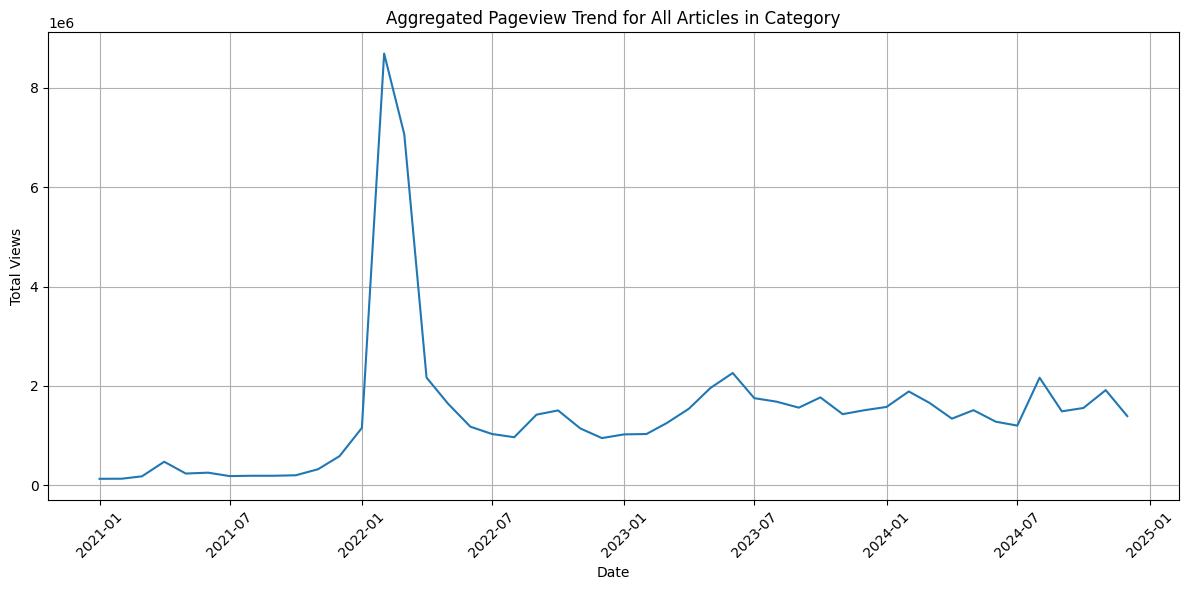

Dominant frequency: 0.0
Estimated period: None months


In [30]:
import requests
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def fetch_articles_in_category(category_name):
    """Fetch all articles in a given category."""
    url = f"https://en.wikipedia.org/w/api.php?action=query&list=categorymembers&cmtitle=Category:{category_name}&cmlimit=50&format=json"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        articles = [item['title'] for item in data['query']['categorymembers']]
        return articles
    else:
        print(f"Failed to fetch articles for category {category_name}. Status: {response.status_code}, Response: {response.text}")
        return []

def fetch_pageviews(article, start_date, end_date, granularity):
    """Fetch pageviews for a given article."""
    article_title = article.replace(" ", "_")  # Replace spaces with underscores
    url = f"https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/{article_title}/{granularity}/{start_date}/{end_date}"
    headers = {"User-Agent": "PageviewAnalysis/1.0 (myemail@example.com)"}
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        data = response.json()
        return data['items']
    else:
        print(f"Failed to fetch pageviews for {article}. Status: {response.status_code}, Response: {response.text}")
        return []

def aggregate_pageviews_by_month(articles, start_date, end_date, granularity="monthly"):
    """Fetch and aggregate pageviews by month for all articles."""
    aggregated_data = {}
    
    for article in articles:
        print(f"Fetching pageviews for article: {article}")
        pageviews_data = fetch_pageviews(article, start_date, end_date, granularity)
        
        # Aggregate views by month
        for item in pageviews_data:
            date = item['timestamp'][:6]  # Extract YYYYMM (month granularity)
            views = item['views']
            
            if date not in aggregated_data:
                aggregated_data[date] = 0
            aggregated_data[date] += views
    
    # Sort the data by date (key)
    aggregated_data = dict(sorted(aggregated_data.items()))
    
    return aggregated_data

def plot_aggregated_trend(aggregated_data):
    """Plot aggregated pageviews trend for all articles in the category."""
    dates = list(aggregated_data.keys())
    views = list(aggregated_data.values())
    
    # Convert string dates to datetime
    dates = pd.to_datetime(dates, format='%Y%m')
    
    # Plotting the aggregated views
    plt.figure(figsize=(12, 6))
    plt.plot(dates, views, label="Total Views for Category")
    plt.xlabel("Date")
    plt.ylabel("Total Views")
    plt.title("Aggregated Pageview Trend for All Articles in Category")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def calculate_periodicity(views):
    """Calculate periodicity using Fourier Transform on aggregated views."""
    # Perform Fourier Transform
    fourier_transform = np.fft.fft(views)
    
    # Calculate the frequencies
    frequencies = np.fft.fftfreq(len(views))
    
    # Get the dominant frequency (most periodic)
    dominant_frequency = frequencies[np.argmax(np.abs(fourier_transform))]
    period = 1 / dominant_frequency if dominant_frequency != 0 else None
    
    print(f"Dominant frequency: {dominant_frequency}")
    print(f"Estimated period: {period} months")
    
    # Return the frequency and period for reference
    return dominant_frequency, period

def fetch_and_analyze_trends(categories, start_date, end_date, granularity="monthly"):
    """Fetch data for categories and analyze trends for all articles combined."""
    for category in categories:
        print(f"Analyzing category: {category}")
        articles = fetch_articles_in_category(category)
        
        # Fetch and aggregate data for all articles in the category
        aggregated_data = aggregate_pageviews_by_month(articles, start_date, end_date, granularity)
        
        # Plot the aggregated trend
        plot_aggregated_trend(aggregated_data)
        
        # Calculate and print periodicity
        if len(aggregated_data) > 1:
            views = list(aggregated_data.values())
            calculate_periodicity(views)

# Example usage
categories = ["Russo-Ukrainian_War"]
start_date = "20210101"
end_date = "20241231"
granularity = "monthly"  # Can also use 'daily'

# Fetch and analyze trends for all articles in the categories
fetch_and_analyze_trends(categories, start_date, end_date, granularity)


Analyzing category: Russo-Ukrainian War
Fetching pageviews for article: Russo-Ukrainian War
Fetching pageviews for article: Annexation of Crimea by the Russian Federation
Fetching pageviews for article: Russian invasion of Ukraine
Fetching pageviews for article: War in Donbas
Fetching pageviews for article: Outline of the Russo-Ukrainian War
Fetching pageviews for article: 2014 pro-Russian unrest in Ukraine
Fetching pageviews for article: 2015 Ukraine power grid hack
Fetching pageviews for article: 2024 visits by Viktor Orbán to Russia and China
Fetching pageviews for article: Anti-Maidan
Fetching pageviews for article: Best in Hell
Fetching pageviews for article: Book of Remembrance for Those Who Fell for Ukraine
Fetching pageviews for article: Bridges in the Russo-Ukrainian War
Fetching pageviews for article: Confiscation of Russian central bank funds
Fetching pageviews for article: Crimean consensus
Fetching pageviews for article: Croatia and the Russo-Ukrainian War
Fetching pagevie

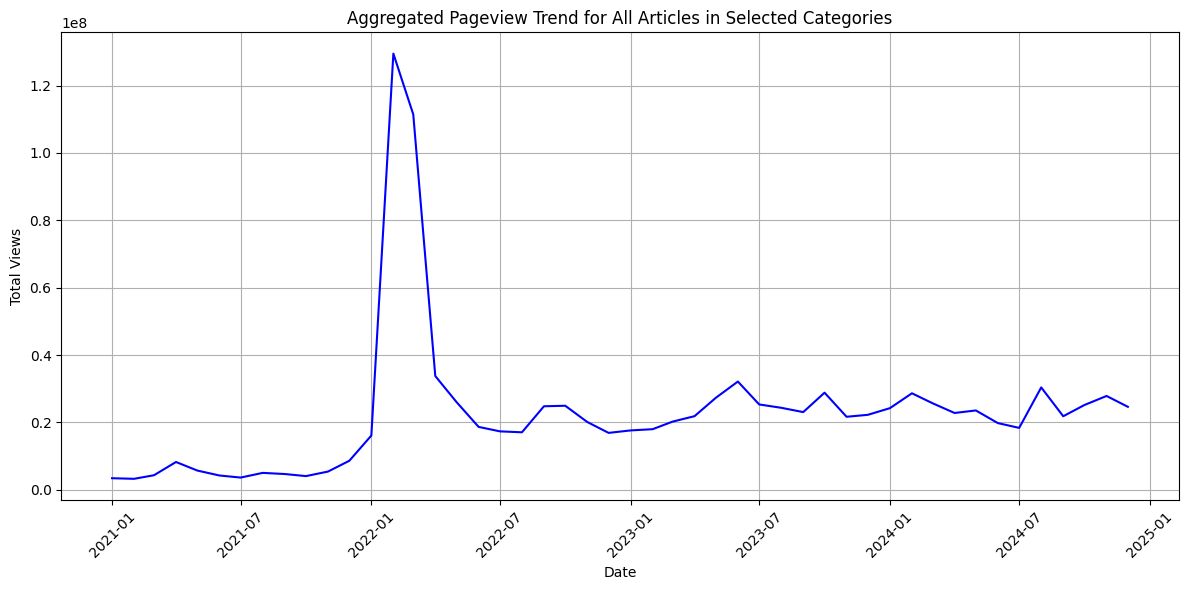

Dominant frequency: 0.0
Estimated period: None months


In [33]:
import requests
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def fetch_articles_in_category(category_name):
    """Fetch all articles in a given category."""
    url = f"https://en.wikipedia.org/w/api.php?action=query&list=categorymembers&cmtitle=Category:{category_name}&cmlimit=50&format=json"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        articles = [item['title'] for item in data['query']['categorymembers']]
        return articles
    else:
        print(f"Failed to fetch articles for category {category_name}. Status: {response.status_code}, Response: {response.text}")
        return []

def fetch_pageviews(article, start_date, end_date, granularity):
    """Fetch pageviews for a given article."""
    article_title = article.replace(" ", "_")  # Replace spaces with underscores
    url = f"https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/{article_title}/{granularity}/{start_date}/{end_date}"
    headers = {"User-Agent": "PageviewAnalysis/1.0 (myemail@example.com)"}
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        data = response.json()
        return data['items']
    else:
        print(f"Failed to fetch pageviews for {article}. Status: {response.status_code}, Response: {response.text}")
        return []

def aggregate_pageviews_by_month(articles, start_date, end_date, granularity="monthly"):
    """Fetch and aggregate pageviews by month for all articles."""
    aggregated_data = {}
    
    for article in articles:
        print(f"Fetching pageviews for article: {article}")
        pageviews_data = fetch_pageviews(article, start_date, end_date, granularity)
        
        # Aggregate views by month
        for item in pageviews_data:
            date = item['timestamp'][:6]  # Extract YYYYMM (month granularity)
            views = item['views']
            
            if date not in aggregated_data:
                aggregated_data[date] = 0
            aggregated_data[date] += views
    
    # Sort the data by date (key)
    aggregated_data = dict(sorted(aggregated_data.items()))
    
    return aggregated_data

def plot_combined_trend(all_aggregated_data):
    """Plot combined aggregated pageviews trend for all articles from multiple categories."""
    # Combine the data from all categories
    combined_aggregated_data = {}
    
    for category_data in all_aggregated_data:
        for date, views in category_data.items():
            if date not in combined_aggregated_data:
                combined_aggregated_data[date] = 0
            combined_aggregated_data[date] += views
    
    # Sort the data by date
    combined_aggregated_data = dict(sorted(combined_aggregated_data.items()))
    
    dates = list(combined_aggregated_data.keys())
    views = list(combined_aggregated_data.values())
    
    # Convert string dates to datetime
    dates = pd.to_datetime(dates, format='%Y%m')
    
    # Plotting the combined views
    plt.figure(figsize=(12, 6))
    plt.plot(dates, views, label="Total Views for All Categories Combined", color="blue")
    plt.xlabel("Date")
    plt.ylabel("Total Views")
    plt.title("Aggregated Pageview Trend for All Articles in Selected Categories")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def calculate_periodicity(views):
    """Calculate periodicity using Fourier Transform on aggregated views."""
    if len(views) == 0:
        print("No data available for periodicity analysis.")
        return None, None
    
    # Perform Fourier Transform
    fourier_transform = np.fft.fft(views)
    
    # Calculate the frequencies
    frequencies = np.fft.fftfreq(len(views))
    
    # Get the dominant frequency (most periodic)
    dominant_frequency = frequencies[np.argmax(np.abs(fourier_transform))]
    period = 1 / dominant_frequency if dominant_frequency != 0 else None
    
    print(f"Dominant frequency: {dominant_frequency}")
    print(f"Estimated period: {period} months")
    
    # Return the frequency and period for reference
    return dominant_frequency, period

def fetch_and_analyze_trends(categories, start_date, end_date, granularity="monthly"):
    """Fetch data for categories and analyze trends for all articles combined."""
    all_aggregated_data = []
    
    for category in categories:
        print(f"Analyzing category: {category}")
        articles = fetch_articles_in_category(category)
        
        # Fetch and aggregate data for all articles in the category
        aggregated_data = aggregate_pageviews_by_month(articles, start_date, end_date, granularity)
        all_aggregated_data.append(aggregated_data)
        
    # Plot the combined trend
    plot_combined_trend(all_aggregated_data)
    
    # Calculate and print periodicity for combined data
    if all_aggregated_data:
        # Combine data from all categories into one
        combined_views = list(all_aggregated_data[0].values())  # Using the first category data for simplicity
        calculate_periodicity(combined_views)

# Example usage
categories = ["Russo-Ukrainian War",
    "2010s conflicts",
    "2020s conflicts",
    "2010s in Russia",
    "2010s in Ukraine",
    "2020s in Russia",
    "2020s in Ukraine",
    "Conflicts in Ukraine",
    "Invasions by Russia",
    "Invasions of Ukraine",
    "Wars involving Russia",
    "Wars involving Ukraine",
    "Conflicts in territory of the former Soviet Union",
    "Russia–Ukraine military relations",
    "Russian irredentism",
    "Vladimir Putin",
    "Petro Poroshenko",
    "Volodymyr Zelenskyy",
    "21st-century military history of Russia",
    "21st-century military history of Ukraine"]
start_date = "20210101"
end_date = "20241231"
granularity = "monthly"  

# Fetch and analyze trends for all articles in the categories
fetch_and_analyze_trends(categories, start_date, end_date, granularity)


Analyzing category: Russo-Ukrainian War
Fetching pageviews for article: Russo-Ukrainian War
Fetching pageviews for article: Annexation of Crimea by the Russian Federation
Fetching pageviews for article: Russian invasion of Ukraine
Fetching pageviews for article: War in Donbas
Fetching pageviews for article: Outline of the Russo-Ukrainian War
Failed to fetch pageviews for Outline of the Russo-Ukrainian War. Status: 404, Response: {"detail":"The date(s) you used are valid, but we either do not have data for those date(s), or the project you asked for is not loaded yet. Please check documentation for more information","method":"get","status":404,"title":"Not Found","type":"about:blank","uri":"/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Outline_of_the_Russo-Ukrainian_War/daily/20220101/20220630"}
Fetching pageviews for article: 2014 pro-Russian unrest in Ukraine
Fetching pageviews for article: 2015 Ukraine power grid hack
Failed to fetch pageviews for 2015 Ukraine pow

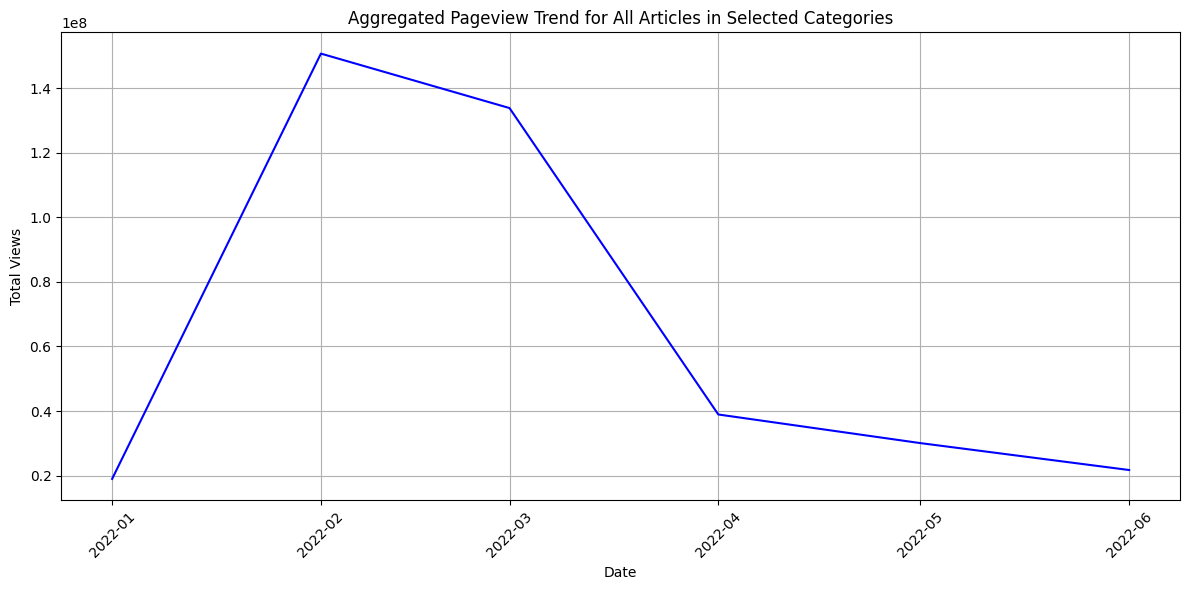

Dominant frequency: 0.0
Estimated period: None months


In [43]:
import requests
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Fetch all articles in a given category.
def fetch_category_articles(category, include_subcategories=False,write_to_file=False):
    def fetch_subcategories(category):
        subcategories = []
        cmcontinue = ""
        while True:
            url = f"https://en.wikipedia.org/w/api.php?action=query&list=categorymembers&cmtitle=Category:{category}&cmtype=subcat&cmlimit=max&format=json&cmcontinue={cmcontinue}"
            response = requests.get(url).json()
            subcategories.extend([cat["title"] for cat in response["query"]["categorymembers"]])
            if "continue" in response:
                cmcontinue = response["continue"]["cmcontinue"]
            else:
                break
        return subcategories

    def fetch_pages(category):
        pages = []
        cmcontinue = ""
        while True:
            url = f"https://en.wikipedia.org/w/api.php?action=query&list=categorymembers&cmtitle=Category:{category}&cmtype=page&cmlimit=max&format=json&cmcontinue={cmcontinue}"
            response = requests.get(url).json()
            pages.extend([page["title"] for page in response["query"]["categorymembers"]])
            if "continue" in response:
                cmcontinue = response["continue"]["cmcontinue"]
            else:
                break
        return pages

    articles = fetch_pages(category)
    if include_subcategories:
        subcategories = fetch_subcategories(category)
        for subcategory in subcategories:
            articles.extend(fetch_pages(subcategory.replace("Category:", "")))

    return articles
    
# Fetch pageviews for a given article.
def fetch_pageviews(article, start_date, end_date, granularity):
    article_title = article.replace(" ", "_")  # Replace spaces with underscores
    url = f"https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/{article_title}/{granularity}/{start_date}/{end_date}"
    headers = {"User-Agent": "PageviewAnalysis/1.0 (myemail@example.com)"}
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        data = response.json()
        return data['items']
    else:
        print(f"Failed to fetch pageviews for {article}. Status: {response.status_code}, Response: {response.text}")
        return []

# Fetch and aggregate pageviews by month for all articles
def aggregate_pageviews_by_month(articles, start_date, end_date, granularity="monthly"):
    aggregated_data = {}
    
    for article in articles:
        print(f"Fetching pageviews for article: {article}")
        pageviews_data = fetch_pageviews(article, start_date, end_date, granularity)
        
        # Aggregate views by month
        for item in pageviews_data:
            date = item['timestamp'][:6]  # Extract YYYYMM (month granularity)
            views = item['views']
            
            if date not in aggregated_data:
                aggregated_data[date] = 0
            aggregated_data[date] += views
    
    # Sort the data by date (key)
    aggregated_data = dict(sorted(aggregated_data.items()))
    
    return aggregated_data

# Plot combined aggregated pageviews trend for all articles from multiple categories
def plot_combined_trend(all_aggregated_data):
    # Combine the data from all categories
    combined_aggregated_data = {}
    
    for category_data in all_aggregated_data:
        for date, views in category_data.items():
            if date not in combined_aggregated_data:
                combined_aggregated_data[date] = 0
            combined_aggregated_data[date] += views
    
    # Sort the data by date
    combined_aggregated_data = dict(sorted(combined_aggregated_data.items()))
    
    dates = list(combined_aggregated_data.keys())
    views = list(combined_aggregated_data.values())
    
    # Convert string dates to datetime
    dates = pd.to_datetime(dates, format='%Y%m')
    
    # Plotting the combined views
    plt.figure(figsize=(12, 6))
    plt.plot(dates, views, label="Total Views for All Categories Combined", color="blue")
    plt.xlabel("Date")
    plt.ylabel("Total Views")
    plt.title("Aggregated Pageview Trend for All Articles in Selected Categories")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Calculate periodicity using Fourier Transform on aggregated views.
def calculate_periodicity(views):
    if len(views) == 0:
        print("No data available for periodicity analysis.")
        return None, None
    
    fourier_transform = np.fft.fft(views)
    
    frequencies = np.fft.fftfreq(len(views))
    
    # Get the dominant frequency (most periodic)
    dominant_frequency = frequencies[np.argmax(np.abs(fourier_transform))]
    period = 1 / dominant_frequency if dominant_frequency != 0 else None
    
    print(f"Dominant frequency: {dominant_frequency}")
    print(f"Estimated period: {period} months")
    
    return dominant_frequency, period

# Fetch data for categories and analyze trends for all articles combined.
def fetch_and_analyze_trends(categories, start_date, end_date, granularity="monthly"):
    all_aggregated_data = []
    
    for category in categories:
        print(f"Analyzing category: {category}")
        articles = fetch_category_articles(category)
        
        # Fetch and aggregate data for all articles in the category
        aggregated_data = aggregate_pageviews_by_month(articles, start_date, end_date, granularity)
        all_aggregated_data.append(aggregated_data)
        
    plot_combined_trend(all_aggregated_data)
    
    # Get periodicity for combined data
    if all_aggregated_data:
        combined_views = list(all_aggregated_data[0].values())  
        calculate_periodicity(combined_views)

categories_war = ["Russo-Ukrainian War",
    "2010s conflicts",
    "2020s conflicts",
    "2010s in Russia",
    "2010s in Ukraine",
    "2020s in Russia",
    "2020s in Ukraine",
    "Conflicts in Ukraine",
    "Invasions by Russia",
    "Invasions of Ukraine",
    "Wars involving Russia",
    "Wars involving Ukraine",
    "Conflicts in territory of the former Soviet Union",
    "Russia–Ukraine military relations",
    "Russian irredentism",
    "Vladimir Putin",
    "Petro Poroshenko",
    "Volodymyr Zelenskyy",
    "21st-century military history of Russia",
    "21st-century military history of Ukraine"]

categories_elections = [ 
        "2016_United_States_presidential_election",
        "2016_Democratic_Party_presidential_primaries",
        "2016_Republican_Party_presidential_primaries",
        "2020_United_States_presidential_election",
        "2020_Democratic_Party_presidential_primaries",
        "2020_Republican_Party_presidential_primaries",
        "2024_United_States_presidential_election",
        "2024_Democratic_Party_presidential_primaries",
        "2024_Republican_Party_presidential_primaries"
        ]
start_date = "20220101"
end_date = "20220630"

start_date_elections = "20160101"
end_date_elections = "20250101"

fetch_and_analyze_trends(categories_war, start_date, end_date, granularity="daily")


Views for elections -> getting all the articles related to the elctions from 2016, 2020 and 2024, then put them into a list and analyze the trend